In [103]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [107]:
df['target'] = iris.target

In [109]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
listo = []
for i in df.target:
    listo.append(iris.target_names[i])


df['target_name'] = listo
    

In [113]:
df['t2'] = df.target.apply(lambda x: iris.target_names[x])

In [115]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,t2
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,setosa,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,virginica
146,6.3,2.5,5.0,1.9,2,virginica,virginica
147,6.5,3.0,5.2,2.0,2,virginica,virginica
148,6.2,3.4,5.4,2.3,2,virginica,virginica


In [117]:
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]

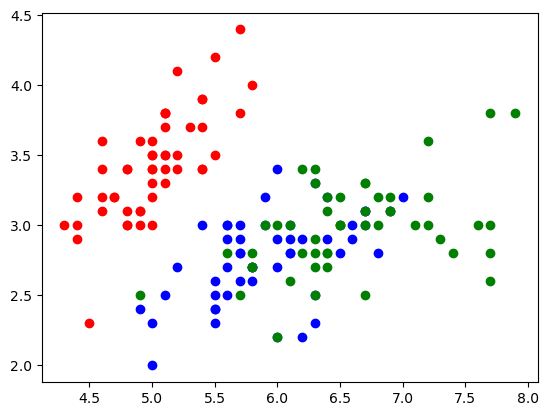

In [121]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green')

In [123]:
from sklearn.model_selection import train_test_split

In [125]:
X = df.drop(['target','target_name','t2'],axis='columns')



In [127]:
y = df['target_name']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [131]:
from sklearn.svm import SVC

model = SVC()

In [137]:
model.fit(X_train,y_train)

0.9666666666666667

In [139]:
model.predict([[5.1,3.5,1.4,0.2]])

C:\Users\thang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [149]:

from sklearn.datasets import load_digits

hand = load_digits()

In [151]:
dir(hand)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [155]:
df2 = pd.DataFrame(hand.data,columns = hand.feature_names)

In [161]:
df2['target'] = hand.target

In [165]:
X = df2.drop('target',axis='columns')

In [169]:
y = df2.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [173]:
xo_train, xo_test, yo_train, yo_test = train_test_split(
    X, y, test_size=0.2)

In [175]:
cla = SVC()

In [177]:
cla.fit(xo_train,yo_train)

SVC()

In [179]:
cla.score(xo_train,yo_train)

0.9965205288796103

In [185]:
po = cla.predict(xo_test)

In [183]:
from sklearn.metrics import r2_score

In [187]:
r2_score(yo_test,po)

0.9800941603294095

In [193]:
from sklearn.ensemble import RandomForestClassifier

logo = RandomForestClassifier()

logo.fit(xo_train,yo_train)

RandomForestClassifier()

In [195]:
co = logo.predict(xo_test)

In [201]:
from sklearn.metrics import confusion_matrix

co1 = confusion_matrix(yo_test,co)

<Axes: >

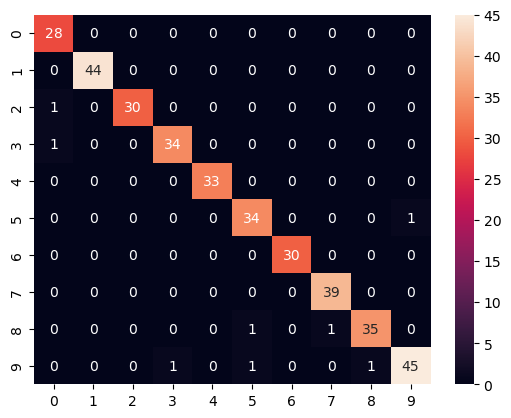

In [205]:
import seaborn as sns

sns.heatmap(co1 , annot = True)